```{contents}
```

## OLS

* **OLS (Ordinary Least Squares)** is the most common method to estimate the parameters (coefficients) of a linear regression model.
* It finds the **best-fit line** by **minimizing the sum of squared errors (residuals)** between actual and predicted values.

$$
\text{Residual (error)} = y_i - \hat{y}_i
$$

$$
\hat{y}_i = \beta_0 + \beta_1x_i
$$

---

### Objective

OLS minimizes:

$$
SSE = \sum_{i=1}^n (y_i - (\beta_0 + \beta_1x_i))^2
$$

Where:

* $y_i$ = actual value
* $\hat{y}_i$ = predicted value
* $n$ = number of observations

This ensures the line is as close as possible to all data points.

---

### Derivation (Simple Linear Regression)

We solve for parameters $\beta_0$ (intercept) and $\beta_1$ (slope) using calculus:

1. Take partial derivatives of SSE wrt $\beta_0$ and $\beta_1$.
2. Set them = 0 (to minimize error).
3. Solve → gives the **normal equations**.

Final formulas:

* **Slope**:

$$
\beta_1 = \frac{\sum (x_i - \bar{x})(y_i - \bar{y})}{\sum (x_i - \bar{x})^2}
$$

* **Intercept**:

$$
\beta_0 = \bar{y} - \beta_1 \bar{x}
$$

---

### Multiple Linear Regression (Matrix Form)

For multiple features:

$$
Y = X\beta + \epsilon
$$

OLS solution:

$$
\hat{\beta} = (X^TX)^{-1}X^TY
$$

Where:

* $X$ = feature matrix
* $Y$ = target vector
* $\beta$ = coefficient vector

---

### Why OLS?

✅ Simple and widely used
✅ Provides exact solution (no iterations needed, unlike Gradient Descent)
✅ Works well when data assumptions hold (linearity, independence, homoscedasticity, normality of errors)

---

👉 In short:
OLS gives us a **mathematical way** to find the regression line by minimizing squared differences between actual and predicted values.


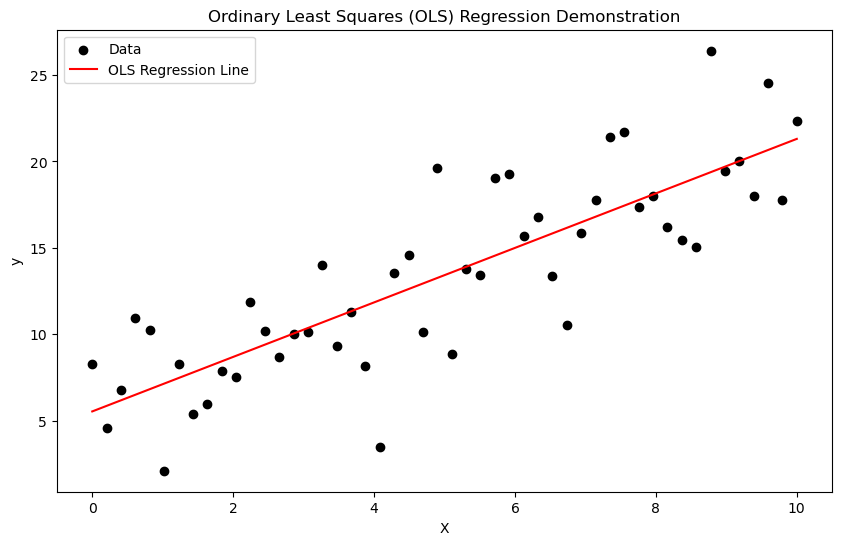

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.686
Model:                            OLS   Adj. R-squared:                  0.680
Method:                 Least Squares   F-statistic:                     105.1
Date:                Sat, 06 Sep 2025   Prob (F-statistic):           1.12e-13
Time:                        11:07:38   Log-Likelihood:                -128.12
No. Observations:                  50   AIC:                             260.2
Df Residuals:                      48   BIC:                             264.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.5391      0.892      6.207      0.0

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Generate synthetic linear data
np.random.seed(0)
X = np.linspace(0, 10, 50)
y = 3 + 2*X + np.random.normal(scale=3, size=X.shape)

# Add constant for intercept
X_with_const = sm.add_constant(X)

# Ordinary Least Squares regression
model = sm.OLS(y, X_with_const)
results = model.fit()

# Predictions
y_pred = results.predict(X_with_const)

# Plot
plt.figure(figsize=(10, 6))
plt.scatter(X, y, label="Data", color="black")
plt.plot(X, y_pred, label="OLS Regression Line", color="red")
plt.xlabel("X")
plt.ylabel("y")
plt.title("Ordinary Least Squares (OLS) Regression Demonstration")
plt.legend()
plt.show()

# Display regression summary
print(results.summary())


Explaining every field in your **OLS Regression Results** output with its meaning and impact:

---

### Interpretation of summary()

* **Dep. Variable: y** → The dependent variable being predicted. Here it’s `y`.
* **R-squared: 0.686** → 68.6% of the variation in `y` is explained by `x1`. Decent explanatory power.
* **Adj. R-squared: 0.680** → Adjusts for number of predictors. Very close to R² since only one predictor. Confirms good fit.
* **Model: OLS** → Ordinary Least Squares regression used.
* **Method: Least Squares** → Coefficients estimated by minimizing sum of squared residuals.
* **F-statistic: 105.1** → Tests whether the model explains significant variation in `y`. Large value means strong relationship.
* **Prob (F-statistic): 1.12e-13** → p-value for F-test. Almost zero. Model is statistically significant.
* **Date / Time** → When the model was run. No analytical impact.
* **Log-Likelihood: -128.12** → Likelihood measure. Closer to 0 is better. Mainly used for comparing models.
* **AIC: 260.2 / BIC: 264.1** → Information criteria. Lower = better. Used when comparing models with different predictors.

---

#### Observations and Degrees of Freedom

* **No. Observations: 50** → Sample size = 50. Larger samples give more reliable estimates.
* **Df Residuals: 48** → Degrees of freedom left after estimating parameters. Formula: $n - k$, where $k$ = number of estimated parameters (here 2: intercept + slope).
* **Df Model: 1** → Number of explanatory variables (only `x1`).
* **Covariance Type: nonrobust** → Default error estimation. Alternatives (robust, clustered) handle heteroscedasticity or dependence.

---

#### Coefficients Table


| Variable | Coefficient | Std. Error | t-Statistic | P-Value | 95% Confidence Interval |
| -------- | ----------- | ---------- | ----------- | ------- | ----------------------- |
| const    | 5.5391      | 0.892      | 6.207       | 0.000   | \[3.745, 7.333]         |
| x1       | 1.5765      | 0.154      | 10.252      | 0.000   | \[1.267, 1.886]         |


* **coef**

  * `const = 5.54` → Predicted $y$ when $x1 = 0$.
  * `x1 = 1.58` → For every 1-unit increase in `x1`, `y` increases by \~1.58 units.
* **std err**

  * Measures uncertainty of coefficient estimate. Smaller = more precise.
* **t**

  * Test statistic for hypothesis $H_0: \beta=0$.
  * Example: $t = 10.25$ for `x1` means the slope is very far from zero.
* **P>|t|**

  * p-value for the t-test. Both are 0.000 → coefficients are statistically significant.
* **\[0.025, 0.975]**

  * 95% confidence interval. For `x1`, true slope lies between 1.27 and 1.89 with 95% confidence.

---

#### Residual Diagnostics

* **Omnibus: 0.236 / Prob(Omnibus): 0.889** → Test for normality of residuals. High p-value = residuals look normal.
* **Jarque-Bera (JB): 0.023 / Prob(JB): 0.989** → Another normality test. p ≈ 0.99 → no evidence against normal distribution.
* **Skew: -0.051** → Residuals are almost symmetric (0 = perfect symmetry).
* **Kurtosis: 3.022** → Residuals have near-normal tail behavior (3 = normal).
* **Durbin-Watson: 2.078** → Tests autocorrelation in residuals. 2 = no autocorrelation. Value here is excellent.
* **Cond. No.: 11.7** → Condition number. Low (< 30) → no multicollinearity problems.

---

#### Impact Summary

* Model is **statistically significant** (F-test p ≈ 0).
* **x1** strongly predicts `y` (slope \~1.58, highly significant).
* Residual diagnostics confirm **assumptions of OLS hold** (normality, independence, no multicollinearity).
* About **69% of variation** in `y` is explained. Remaining 31% is due to noise or omitted variables.

---

Do you want me to also show how to **read this summary in plain English** (like a narrative explanation of what the model is saying)?
